In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
dataset = {
    'Id':[1,2,3,4,5,6,7,8,9,10,11,12,13,14],
    'Age':['<21','<21','21-35','>35','>35','>35','21-35','<21','<21','>35','<21','21-35','21-35','>35'],
    'Income':['High','High','High','Medium','Low','Low','Low','Medium','Low','Medium','Medium','Medium','High','Medium'],
    'Gender':['Male','Male','Male','Male','Female','Female','Female','Male','Female','Female','Female','Male','Female','Male'],
    'MaritalStatus':['Single','Married','Single','Single','Single','Married','Married','Single','Married','Single','Married','Married','Single','Married'],
    'Buys':['No','No','Yes','Yes','Yes','No','Yes','No','Yes','Yes','Yes','Yes','Yes','No']
}

In [29]:
df = pd.DataFrame(dataset)


In [45]:
df


,Id,Age,Income,Gender,MaritalStatus,Buys
0,1,<21,High,Male,Single,No
1,2,<21,High,Male,Married,No
2,3,21-35,High,Male,Single,Yes
3,4,>35,Medium,Male,Single,Yes
4,5,>35,Low,Female,Single,Yes
5,6,>35,Low,Female,Married,No
6,7,21-35,Low,Female,Married,Yes
7,8,<21,Medium,Male,Single,No
8,9,<21,Low,Female,Married,Yes
9,10,>35,Medium,Female,Single,Yes


In [46]:
# df["Age"]
df[["Age"]]

,Age
0,<21
1,<21
2,21-35
3,>35
4,>35
5,>35
6,21-35
7,<21
8,<21
9,>35


In [66]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [48]:
df["Age"] = le.fit_transform(df["Age"])
df["Income"] = le.fit_transform(df["Income"])
df["Gender"] = le.fit_transform(df["Gender"])
df["MaritalStatus"] = le.fit_transform(df["MaritalStatus"])
df["Buys"] = le.fit_transform(df["Buys"])



In [49]:
df


,Id,Age,Income,Gender,MaritalStatus,Buys
0,1,1,0,1,1,0
1,2,1,0,1,0,0
2,3,0,0,1,1,1
3,4,2,2,1,1,1
4,5,2,1,0,1,1
5,6,2,1,0,0,0
6,7,0,1,0,0,1
7,8,1,2,1,1,0
8,9,1,1,0,0,1
9,10,2,2,0,1,1


In [50]:
x  = df.iloc[:,:-1]
x

,Id,Age,Income,Gender,MaritalStatus
0,1,1,0,1,1
1,2,1,0,1,0
2,3,0,0,1,1
3,4,2,2,1,1
4,5,2,1,0,1
5,6,2,1,0,0
6,7,0,1,0,0
7,8,1,2,1,1
8,9,1,1,0,0
9,10,2,2,0,1


In [51]:
y = df.iloc[:,5]
y

0     0
1     0
2     1
3     1
4     1
5     0
6     1
7     0
8     1
9     1
10    1
11    1
12    1
13    0
Name: Buys, dtype: int32

In [56]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier();
clf = clf.fit(x,y)
clf.tree_.feature[0]  
# get index of the root node


0

In [61]:
#returns the feature name of the root node
x.columns[clf.tree_.feature[0]]

'Id'

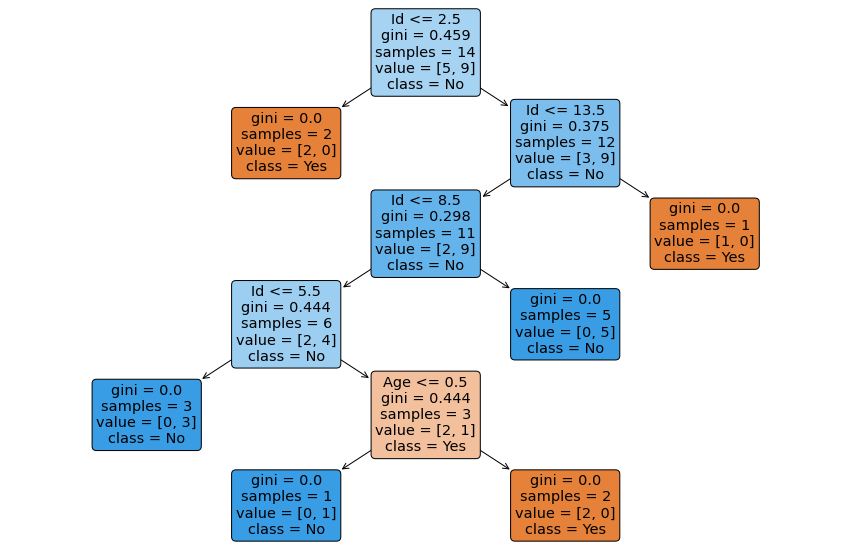

In [65]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
plt.figure(figsize=(15,10))
plot_tree(clf,rounded=True,filled=True,class_names=["Yes","No"],feature_names=x.columns)
plt.show()